<a href="https://colab.research.google.com/github/Taedriel/ZSL-v2/blob/visual2textual/vector-generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow_datasets

In [3]:
import numpy as np
import time
import pandas as pd
import matplotlib.pylab as plt
import PIL.Image as Image
import tensorflow as tf
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input
from tensorflow.keras.backend import function
from tensorflow.keras.preprocessing import image


In [4]:
model_1 = MobileNetV2(weights="imagenet", input_tensor=Input(shape=(224, 224, 3))) 
model = VGG16(weights="imagenet", input_tensor=Input(shape=(224, 224, 3)))

553476096/553467096 [==============================] - 4s 0us/step


In [5]:
def preprocess_img(img):
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    return img

In [6]:
from logging import NullHandler
def generate_visual_feature_vector(model, img=NullHandler, image_path=NullHandler, num_layer=0, path=True):
    output = function(model.input, model.layers[num_layer].output)
    if path :
        img = image.load_img(image_path, target_size=(224, 224))
    img = preprocess_img(img)

    return output(img)

In [7]:
def predict(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = np.array(img)
    normalized = img/ 255.0
    reshaped = np.reshape(normalized, (1, 224, 224, 3))
    result = model.predict(reshaped)
    predicted_class = tf.math.argmax(result[0], axis=-1)
    labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
    imagenet_labels = np.array(open(labels_path).read().splitlines())
    plt.imshow(img)
    plt.axis('off')
    predicted_class_name = imagenet_labels[predicted_class]
    _ = plt.title("Prediction: " + predicted_class_name.title())


# Test :

24576/10484 [======================================================================] - 0s 0us/step


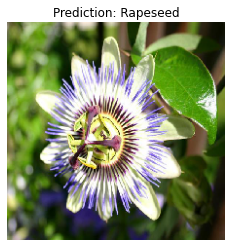

In [8]:
img_path = '/content/drive/MyDrive/data/102flowers/jpg/image_00001.jpg'
predict(model_1, img_path)


In [9]:
model_1.layers

In [10]:
vectors = generate_visual_feature_vector(model_1, image_path=img_path, num_layer=len(model_1.layers)-2)

In [11]:
vectors.shape

(1, 1280)

In [12]:
vectors

array([[0.        , 1.6348932 , 0.13972224, ..., 0.        , 0.30155453,
        0.0067654 ]], dtype=float32)

## Mapping visual and textual vectors :

In [14]:
df = pd.read_csv("/content/drive/MyDrive/data/imageNet-embeddeding.csv")

In [17]:
df.shape

(1000, 1025)

In [19]:
df.head(5)

,background,0.5182147026062012,-4.485192775726318,0.03793242573738098,-5.88853645324707,1.7488670349121094,-1.9801608324050903,-0.44985759258270264,2.320920944213867,3.536499500274658,...,0.8781245946884155,0.03818821907043457,-2.415496349334717,3.447939872741699,0.7035098671913147,0.7574580907821655,-1.5631132125854492,-0.5927622318267822,1.469620943069458,4.493611812591553
0,tench,-1.159002,-2.179661,3.047377,-0.387706,0.691971,-2.487729,1.142464,2.571109,3.054543,...,-0.548321,-0.239783,-7.169405,1.407730,1.649307,2.018528,-1.431276,-1.216910,-0.767912,3.208218
1,goldfish,-1.434238,-1.657735,-1.765184,-1.383108,-0.115719,1.876161,1.974708,0.691036,3.838443,...,0.840993,0.220131,-5.182143,0.413247,1.214857,2.267437,-2.285498,3.672451,-2.266966,1.677125
2,great white shark,-2.278951,-1.157382,-3.689578,-2.314540,-1.199623,-0.279611,0.857225,0.458219,2.556669,...,0.325159,-2.508452,-5.492269,2.491271,1.026381,6.363173,-1.378001,-1.908388,-4.556684,1.346585
3,tiger shark,-1.897356,-1.553241,-3.154092,-1.374265,0.339845,0.514139,2.691243,-0.618268,3.244166,...,-0.910642,-0.375736,-5.686347,2.210519,2.943987,4.889155,-1.650050,0.203180,-4.854342,2.097868
4,hammerhead,1.062651,-0.810914,-0.968539,-0.991201,1.126281,1.931853,0.542832,1.553717,1.229181,...,0.086342,-0.802743,-5.365044,2.174908,2.809999,2.599048,-2.604725,3.316464,-1.843225,0.230028


In [24]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = list(np.array(open(labels_path).read().splitlines()))
len(imagenet_labels)

1001

In [25]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=e50b57d9644a78faafa1c68369a078c5ccbcc9d788fb2cb5bd96ff22579b53d3
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [26]:
import os, sys, wget
from zipfile import ZipFile

url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
tiny_imgdataset = wget.download('http://cs231n.stanford.edu/tiny-imagenet-200.zip', out = os.getcwd())
for file in os.listdir(os.getcwd()):
    if file.endswith(".zip"):
        zip = ZipFile(file)
        zip.extractall()
    else:
        print("not found")

not found
not found
not found


10000
